## Import libraries and python files

In [1]:
#import useful libraries 
import pandas as pd
import json
import sys
import requests
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import statsmodels.formula.api as smf
%matplotlib inline 

from data_loader import *
%load_ext autoreload
%autoreload 2


##link to the datasets
## https://www.cs.cmu.edu/~ark/personas/
##https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv
##https://www.kaggle.com/datasets/ashirwadsangwan/imdb-dataset

## Load the different datasets

In [2]:
##load datasets from CMU dataset
df_character = load_character().copy()
df_movie = load_movie().copy()
df_name_cluster = load_name_cluster().copy()
df_summary = load_plot_summary().copy()
df_tropes_cluster = load_tropes_cluster().copy()

In [3]:
df_movie.head()

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>


In [4]:
df_movie.shape

(81741, 12)

In [5]:
# Replace 'id-translation.wikidata.json' with the path to your JSON file
file_path = 'id-translation.wikidata.json'

# Load the JSON file into a DataFrame
df_id_translation = pd.read_json(file_path, orient='records', lines=True)

# Display the loaded DataFrame
display(df_id_translation)

,tconst,Freebase ID
0,nm0010930,/m/0282x
1,nm0124133,/m/09b6zr
2,nm0684496,/m/014d3
3,nm0061667,/m/01rgr
4,tt1675434,/m/0hgqwpj
...,...,...
990440,tt20913312,None
990441,tt29623578,None
990442,nm1456284,None
990443,tt27348595,None


In [6]:
df_id_translation = df_id_translation.dropna(subset=['Freebase ID'])
#df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(397518, 2)


In [7]:
df_id_translation.drop_duplicates(subset=['Freebase ID'], keep='first', inplace=True)
print(df_id_translation.shape)

(396337, 2)


In [8]:
df_movie = pd.merge(df_movie, df_id_translation, on='Freebase ID', how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726


In [9]:
#compute percentage of missing values for df_mvoei
percentage_missing_values_year = (df_movie['Year'].isna().sum()/len(df_movie['Year']))*100
print(f"The percentage of missing values 'Year' release date is {format(percentage_missing_values_year, '.3f')}%.")

percentage_missing_values_month = (df_movie['Month'].isna().sum()/len(df_movie['Month']))*100
print(f"The percentage of missing values 'Month' release date (and therefore 'Day') is {format(percentage_missing_values_month, '.3f')}%.")

percentage_missing_values_revenues = (df_movie['Box office'].isna().sum()/len(df_movie['Box office']))*100
print(f"The percentage of missing values 'Box office' is {format(percentage_missing_values_revenues, '.3f')}%.")

percentage_missing_values_runtime = (df_movie['Runtime'].isna().sum()/len(df_movie['Runtime']))*100
print(f"The percentage of missing values 'Runtime' is {format(percentage_missing_values_runtime, '.3f')}%.")

percentage_missing_values_tconst = (df_movie['tconst'].isna().sum()/len(df_movie['tconst']))*100
print(f"The percentage of missing values 'tconst' is {format(percentage_missing_values_tconst, '.3f')}%.")


The percentage of missing values 'Year' release date is 8.444%.
The percentage of missing values 'Month' release date (and therefore 'Day') is 51.832%.
The percentage of missing values 'Box office' is 89.722%.
The percentage of missing values 'Runtime' is 25.018%.
The percentage of missing values 'tconst' is 9.769%.


In [10]:
##As we can see, a lot of 'Box office' data is missing

## Load addtionnal datasets and merge what we need 

In [11]:
#load imdb dataset (from kaggle)
df_imdb_movie = load_movie_imdb_kaggle()
df_imdb_rating = load_rating_imdb_kaggle() 

In [12]:
#merge movies with rating 
df_movie_rating = pd.merge(df_imdb_movie, df_imdb_rating, on='tconst', how='inner')
display(df_movie_rating)

,tconst,titleType,Name,originalTitle,isAdult,Year,endYear,Runtime,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45.0,Romance,5.3,207
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,100.0,"Documentary,News,Sport",5.3,484
2,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100.0,\N,4.1,15
3,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70.0,"Action,Adventure,Biography",6.0,854
4,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90.0,Drama,5.0,21
...,...,...,...,...,...,...,...,...,...,...,...
299375,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84.0,Thriller,5.8,1446
299376,tt9916362,movie,Coven,Akelarre,0,2020,\N,92.0,"Drama,History",6.4,5600
299377,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,NaN,"Adventure,History,War",3.5,17
299378,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,\N,123.0,Drama,8.6,7


In [13]:
#merge CMU dataset with IMDB dataset
df_movie = pd.merge(df_movie, df_movie_rating[['tconst', 'averageRating', 'numVotes']], on=['tconst'], how='left')
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN


In [14]:
percentage_missing_values_rating = (df_movie['averageRating'].isna().sum()/len(df_movie['averageRating']))*100
print(f"The percentage of missing values 'averageRating' is {format(percentage_missing_values_rating, '.3f')}%.")

percentage_missing_values_votes = (df_movie['numVotes'].isna().sum()/len(df_movie['numVotes']))*100
print(f"The percentage of missing values 'numVotes' is {format(percentage_missing_values_votes, '.3f')}%.")

print(f"The number of movies with missing values for 'averageRating' and 'numVotes' is {df_movie['averageRating'].isna().sum()}.")

The percentage of missing values 'averageRating' is 31.271%.
The percentage of missing values 'numVotes' is 31.271%.
The number of movies with missing values for 'averageRating' and 'numVotes' is 25561.


In [15]:
## load kaggle movie metadata
df_kaggle_movie = load_movie_kaggle()
display(df_kaggle_movie)

,adult,belongs_to_collection,budget,genres,homepage,movieId,tconst,original_language,original_title,overview,...,spoken_languages,status,tagline,Name,video,vote_average,vote_count,Year,Month,Day
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995,10,30
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995,12,15
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995,12,22
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995,12,22
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,<NA>,<NA>,<NA>
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,2011,11,17
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,2003,8,1
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,[],Released,NaN,Satan Triumphant,False,0.0,0.0,1917,10,21


In [16]:
#merge the datasets on the 'Name' column
#df_movie = df_movie.merge(df_kaggle_movie[['Name', 'Year', 'Month', 'Day']], on=['Name', 'Year'], how='left', suffixes=('', '_df2'))
df_movie = df_movie.merge(df_kaggle_movie[['Name', 'Year', 'tconst', 'Month', 'Day']], on=['Name', 'Year','tconst'], how='left', suffixes=('', '_df2'))

In [17]:
#use 'combine_first' to fill in the 'Box office' values from df_kaggle_movie where they are NaN in df_movie
df_movie['Month'] = df_movie['Month'].combine_first(df_movie['Month_df2'])
df_movie['Day'] = df_movie['Day'].combine_first(df_movie['Day_df2'])

#drop the extra 'Box office' column from df_kaggle_movie
df_movie.drop('Month_df2', axis=1, inplace=True)
df_movie.drop('Day_df2', axis=1, inplace=True)
display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0
81755,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN


In [18]:
percentage_missing_values_year = (df_movie['Year'].isna().sum()/len(df_movie['Year']))*100
print(f"The percentage of missing values 'Year' release date is {format(percentage_missing_values_year, '.3f')}%.")

percentage_missing_values_month = (df_movie['Month'].isna().sum()/len(df_movie['Month']))*100
print(f"The percentage of missing values 'Month' release date (and therefore 'Day') is {format(percentage_missing_values_month, '.3f')}%.")

#as we can see, we decrease the percentage of missing values for 'Month' and 'Day' by merging the two datasets by almost 10%

The percentage of missing values 'Year' release date is 8.442%.
The percentage of missing values 'Month' release date (and therefore 'Day') is 42.891%.


In [19]:
#load oscar reward dataset
df_oscar = load_oscar_winner()
display(df_oscar)

,Year,year_ceremony,ceremony,category,name,Name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True
10756,2022,2023,95,WRITING (Original Screenplay),Written by Steven Spielberg & Tony Kushner,The Fabelmans,False
10757,2022,2023,95,WRITING (Original Screenplay),Written by Todd Field,Tár,False
10758,2022,2023,95,WRITING (Original Screenplay),Written by Ruben Östlund,Triangle of Sadness,False


In [20]:
#filter the dataframe to only include rows where 'winner' is True
df_winner_movie = df_oscar[df_oscar['winner'] == True]
display(df_winner_movie)

,Year,year_ceremony,ceremony,category,name,Name,winner
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
6,1927,1928,1,ART DIRECTION,William Cameron Menzies,The Dove;,True
9,1927,1928,1,CINEMATOGRAPHY,Charles Rosher,Sunrise,True
10,1927,1928,1,CINEMATOGRAPHY,Karl Struss,Sunrise,True
...,...,...,...,...,...,...,...
10743,2022,2023,95,SOUND,"Mark Weingarten, James H. Mather, Al Nelson, C...",Top Gun: Maverick,True
10745,2022,2023,95,VISUAL EFFECTS,"Joe Letteri, Richard Baneham, Eric Saindon and...",Avatar: The Way of Water,True
10753,2022,2023,95,WRITING (Adapted Screenplay),Screenplay by Sarah Polley,Women Talking,True
10755,2022,2023,95,WRITING (Original Screenplay),Written by Daniel Kwan & Daniel Scheinert,Everything Everywhere All at Once,True


In [21]:
#filter the dataframe to only include rows where 'winner' is True
df_winner_movie = df_oscar[df_oscar['winner'] == True]

In [22]:
df_winner_movie = df_winner_movie.groupby('Name').agg(
    num_oscars_won=pd.NamedAgg(column='winner', aggfunc='size'),
    years_won=pd.NamedAgg(column='year_ceremony', aggfunc=lambda x: list(x))
).reset_index()

display(df_winner_movie)

,Name,num_oscars_won,years_won
0,'Round Midnight,1,[1987]
1,12 Years a Slave,3,"[2014, 2014, 2014]"
2,1917,3,"[2020, 2020, 2020]"
3,20 Feet from Stardom,1,[2014]
4,"20,000 Leagues under the Sea",2,"[1955, 1955]"
...,...,...,...
1310,Zero Dark Thirty,1,[2013]
1311,Zootopia,1,[2017]
1312,Zorba the Greek,3,"[1965, 1965, 1965]"
1313,the accountant,1,[2002]


In [23]:
#filter the dataframe to only include rows where 'winner' is True
df_winner_movie = df_oscar[df_oscar['winner'] == True]

#group by the movie name and count the winners time
df_winner_movie = df_winner_movie.groupby('Name').agg(
    num_oscars_won=pd.NamedAgg(column='winner', aggfunc='size'),
    years_won=pd.NamedAgg(column='year_ceremony', aggfunc=lambda x: list(x))
).reset_index()

#sort the movies by oscars won
df_oscar_wins = df_winner_movie.sort_values(by='num_oscars_won', ascending=False)

display(df_oscar_wins)


,Name,num_oscars_won,years_won
1203,Titanic,12,"[1954, 1998, 1998, 1998, 1998, 1998, 1998, 199..."
1261,West Side Story,11,"[1962, 1962, 1962, 1962, 1962, 1962, 1962, 196..."
1045,The Lord of the Rings: The Return of the King,11,"[2004, 2004, 2004, 2004, 2004, 2004, 2004, 200..."
130,Ben-Hur,11,"[1960, 1960, 1960, 1960, 1960, 1960, 1960, 196..."
376,Gigi,9,"[1959, 1959, 1959, 1959, 1959, 1959, 1959, 195..."
...,...,...,...
516,Kolya,1,[1997]
517,Kon-Tiki,1,[1952]
518,Krakatoa,1,[1933]
521,La Cucaracha,1,[1935]


In [24]:
#merge CUM and oscars awards dataset
df_movie = pd.merge(df_movie, df_oscar_wins, left_on='Name', right_on='Name', how='left')

#replace NaN values in 'num_oscars_won' with 0 for movies that didn't win any Oscars
df_movie['num_oscars_won'].fillna(0, inplace=True)

display(df_movie)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN,0.0,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,<NA>,<NA>,tt0094806,5.6,40.0,0.0,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,<NA>,<NA>,tt0094320,6.1,2888.0,0.0,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,<NA>,<NA>,tt0083949,6.0,621.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN,0.0,NaN
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0,0.0,NaN
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0,0.0,NaN
81755,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,5,21,tt0113726,NaN,NaN,0.0,NaN


In [25]:
percentage_oascar_movies = ((df_movie['num_oscars_won']!=0).sum()/len(df_movie['num_oscars_won']))*100
print(f"The percentage of movies having won an oscar is {format(percentage_oascar_movies, '.3f')}%.")

The percentage of movies having won an oscar is 1.896%.


## Research on release month and revenues 

In [50]:
#first drop nan month release date values 
df_movie_boxoffice = df_movie.copy(deep=True)
df_movie_boxoffice.dropna(subset=['Box office', 'Month'],inplace=True)
display(df_movie_boxoffice[0:100])

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,8,16,tt0029852,6.8,2265.0,1.0,[1939]
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,11,8,tt0097499,7.5,31169.0,1.0,[1990]
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,8,27,tt0058331,7.8,181595.0,5.0,"[1965, 1965, 1965, 1965, 1965]"
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999,10,1,tt0133122,5.1,5956.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,6244632,/m/0fymw0,Crossover,2006-09-01,7009668.0,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z02hx"": ""Sports"", ""/m/01j1n2"": ""Coming ...",2006,9,1,tt0473024,2.1,9291.0,0.0,NaN
941,1231856,/m/04kkxx,For Love of the Game,1999-09-17,46112640.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01z02hx"": ""Sports"", ""/m/068d7h"": ""Romanti...",1999,9,17,tt0126916,6.6,36861.0,0.0,NaN
960,1612686,/m/05gmn3,Halloween Resurrection,2002-07-12,37664855.0,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m...",2002,7,12,tt0220506,3.9,48222.0,0.0,NaN
977,5080311,/m/0d1t91,The Badlanders,1958-09-03,2105000.0,85.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/0lsxr"":...",1958,9,3,tt0051393,6.4,1652.0,0.0,NaN


In [27]:
movie_revenues = df_movie_boxoffice['Box office'].values
month_release = pd.get_dummies(df_movie_boxoffice['Month']).values
#remove one month column to select it as a baseline here january
month_release = month_release[:, :-1].astype(int)
month_release = sm.add_constant(month_release)

#print(movie_revenues)
#print(month_release)

In [28]:
#model = sm.OLS(movie_revenues, month_release).fit()
#model.summary()

In [29]:
import scipy
import seaborn as sbn
import matplotlib.pyplot as plt
import json
from matplotlib.colors import LogNorm, Normalize



In [30]:
def show_release_count_per_day_for_DF(df):
    df_movie_day = df.copy(deep=True)

    df_movie_day.dropna(subset=['Month'],inplace=True)
    day_count = df_movie_day.groupby("Day").count()

    #display(df_movie_day)

    release_day_count = day_count['Name'].values
    days = np.fromiter(df.groupby("Day").groups.keys(), 'int')

    #print(release_day_count)
    #print(f'Mean without day 1 and 31 : {np.mean(release_day_count[1:30])}')
    
    # scipy.stats.chisquare(release_day_count[1:10])

    sbn.set(rc={'figure.figsize':(10,4)})
    sbn.barplot(x=days, y=release_day_count)
    plt.title('Number of movie premieres for each day of the month')
    plt.xlabel('Day of the month')
    plt.ylabel('Number of movies')
    plt.show()

    
def show_var_day_for_DF(df, var):
    df_movie_day_rating = df.copy(deep=True)
    
    #var = "num_oscars_won"

    df_movie_day_rating.dropna(subset=['Month', var],inplace=True)
    day_rating = df_movie_day_rating.groupby("Day").mean()

    #display(weekday_boxoffice.head())
    
    release_day_rating = day_rating[var].values
    days = df_movie_day_rating["Day"].unique()
    
    if len(days) != len(release_day_rating):
        print('No rating data for every day of the month')
        return
    
    # Graph
    
    sbn.set(rc={'figure.figsize':(10,4)})
    order = np.linspace(1,31,31).astype(int)
    sbn.barplot(x=days, y=release_day_rating, order = order)
    plt.title(f'{var} for movies released on each day of the month')
    plt.xlabel('Day of the month')
    plt.ylabel(f'Average {var}')
    plt.show()


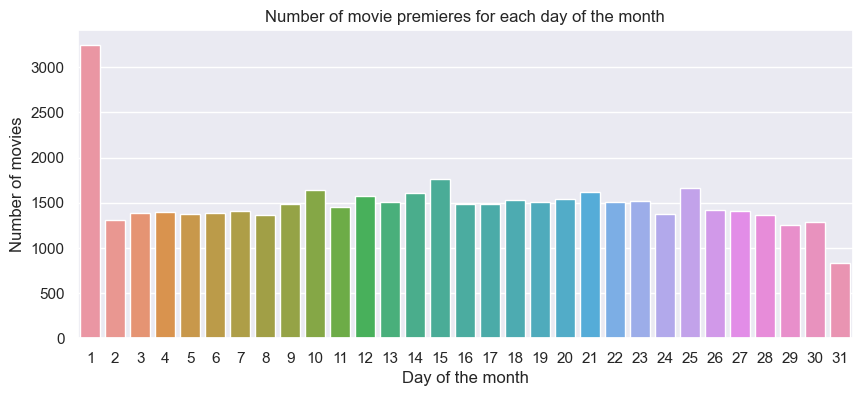

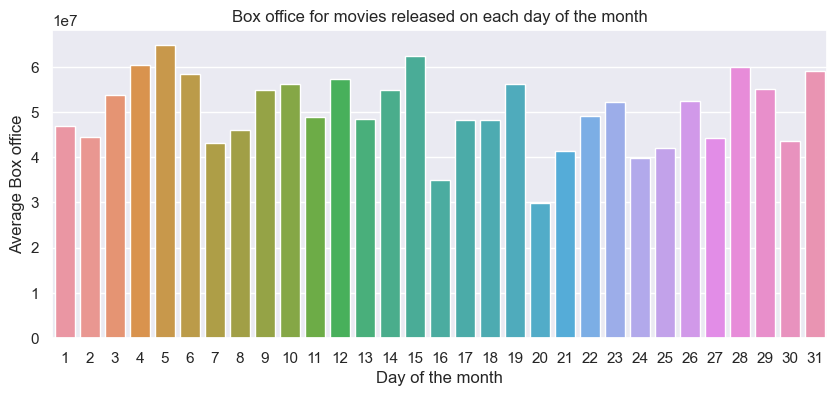

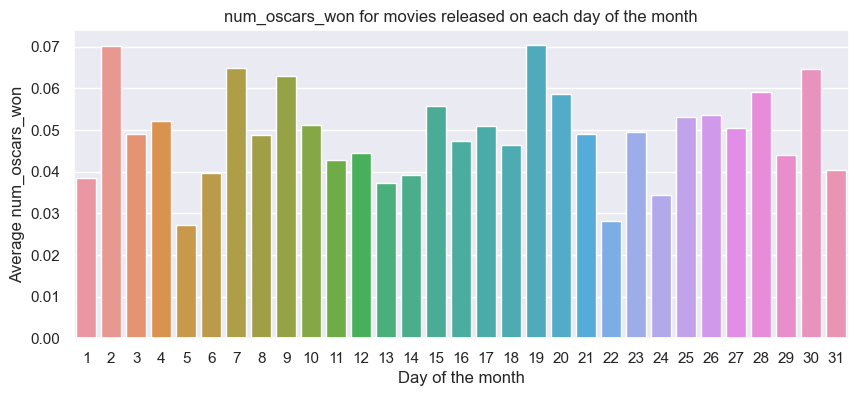

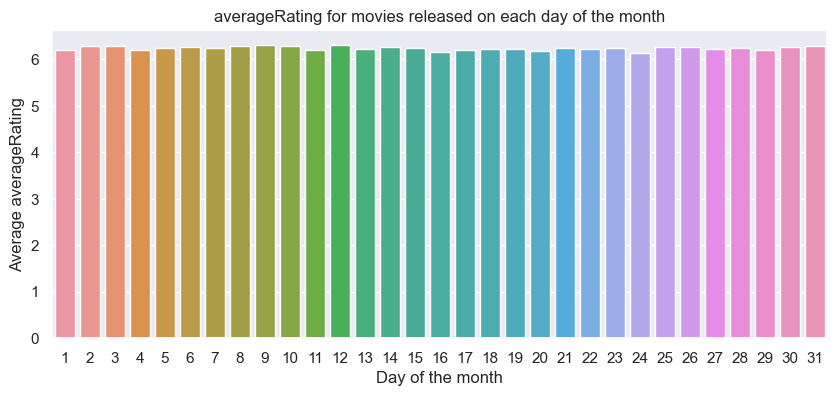

In [31]:
show_release_count_per_day_for_DF(df_movie)
show_var_day_for_DF(df_movie, 'Box office')
show_var_day_for_DF(df_movie, 'num_oscars_won')
show_var_day_for_DF(df_movie, 'averageRating')

In [32]:
def get_weekday(x):
    return pd.to_datetime(x, errors = 'coerce').dayofweek

def get_weekday_name(x):
    return pd.to_datetime(x, errors = 'coerce')

df_time_stamps = df_movie.copy(deep=True)

df_time_stamps.dropna(subset=['Month'], inplace=True)
temp = (df_time_stamps['Year'].astype(str) + '-' 
                                             + df_time_stamps['Month'].astype(str) + '-' 
                                             + df_time_stamps['Day'].astype(str))


df_time_stamps['WeekDay'] = temp.apply(get_weekday)
df_time_stamps.dropna(subset=['WeekDay'], inplace=True)
df_time_stamps['WeekDay'] = df_time_stamps['WeekDay'].apply(int)


df_time_stamps['WeekDay Name'] = temp.apply(get_weekday_name).dt.day_name()
display(df_time_stamps['WeekDay Name'].head())
display(df_time_stamps['WeekDay'].head())

0        Friday
1     Wednesday
5      Thursday
7       Tuesday
12       Friday
Name: WeekDay Name, dtype: object

0     4
1     2
5     3
7     1
12    4
Name: WeekDay, dtype: int64

In [67]:
def weekday_count_for_DF(df):
    weekday_count = df.groupby("WeekDay Name").count()

    #display(weekday_count)

    release_weekday_count = weekday_count['Name'].values
    weekdays = df["WeekDay Name"].unique()

    #Graph 

    sbn.set(rc={'figure.figsize':(10,4)})
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sbn.barplot(x=weekdays, y=release_weekday_count, order = order)
    plt.title('Number of movie premieres for each day of the week')
    plt.xlabel('Day of the week')
    plt.ylabel('Number of movies')
    plt.show()

def boxoffice_weekday_for_DF(df):
    df_movie_weekday_boxoffice = df.copy(deep=True)

    df_movie_weekday_boxoffice.dropna(subset=['Month', 'Box office'],inplace=True)
    weekday_boxoffice = df_movie_weekday_boxoffice.groupby("WeekDay Name").mean()

    display(df_movie_weekday_boxoffice)
    print(len(df_movie_weekday_boxoffice))
    
    release_weekday_boxoffice = weekday_boxoffice['Box office'].values
    weekdays = df_movie_weekday_boxoffice["WeekDay Name"].unique()
    
    if len(weekdays) != len(release_weekday_boxoffice):
        print('No box office data for every day of the week')
        return

    # Graph
    
    sbn.set(rc={'figure.figsize':(10,4)})
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sbn.barplot(x=weekdays, y=release_weekday_boxoffice, order = order)
    plt.title('Box office for movies released on each day of the week')
    plt.xlabel('Day of the week')
    plt.ylabel('Average box office')
    plt.show()
    
def show_var_weekday_for_DF(df, var):
    df_movie_day_rating = df.copy(deep=True)
    
    #var = "num_oscars_won"

    df_movie_day_rating.dropna(subset=['Month', var],inplace=True)
    day_rating = df_movie_day_rating.groupby("WeekDay Name").mean()
    
    display(df_movie_day_rating)
    
    release_day_rating = day_rating[var].values
    days = df_movie_day_rating["WeekDay Name"].unique()
    
    if len(days) != len(release_day_rating):
        print('No rating data for every day of the week')
        return
    
    # Graph
    
    sbn.set(rc={'figure.figsize':(10,4)})
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    sbn.barplot(x=days, y=release_day_rating, order = order)
    plt.title(f'{var} for movies released on each day of the week')
    plt.xlabel('Day of the week')
    plt.ylabel(f'Average {var}')
    plt.show()


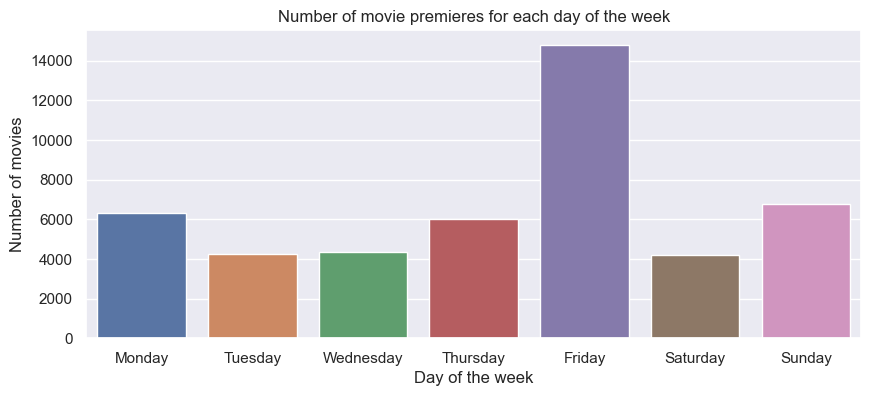

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won,WeekDay,WeekDay Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN,4,Friday
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,8,16,tt0029852,6.8,2265.0,1.0,[1939],1,Tuesday
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,11,8,tt0097499,7.5,31169.0,1.0,[1990],2,Wednesday
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,8,27,tt0058331,7.8,181595.0,5.0,"[1965, 1965, 1965, 1965, 1965]",3,Thursday
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999,10,1,tt0133122,5.1,5956.0,0.0,NaN,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81711,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""...",1988,6,29,tt0094898,7.1,218692.0,0.0,NaN,2,Wednesday
81736,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie...",1990,4,27,tt0100666,5.3,3882.0,0.0,NaN,4,Friday
81741,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana...",2000,8,26,tt0120202,6.7,21888.0,0.0,NaN,5,Saturday
81742,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1993,6,4,tt0107057,5.7,5741.0,0.0,NaN,4,Friday


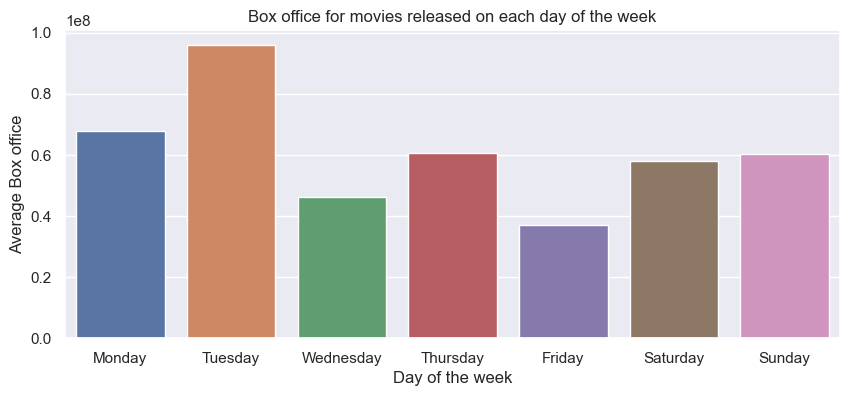

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won,WeekDay,WeekDay Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN,4,Friday
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN,0.0,NaN,2,Wednesday
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,5,29,tt0002894,NaN,NaN,0.0,NaN,3,Thursday
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,8,16,tt0029852,6.8,2265.0,1.0,[1939],1,Tuesday
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,4,4,tt0119548,5.8,1129.0,0.0,NaN,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81751,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi...",2007,10,18,tt0459759,5.8,1066.0,0.0,NaN,3,Thursday
81752,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,3,19,tt1816585,NaN,NaN,0.0,NaN,5,Saturday
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0,0.0,NaN,4,Friday
81754,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,9,22,tt0362411,5.8,110.0,0.0,NaN,4,Friday


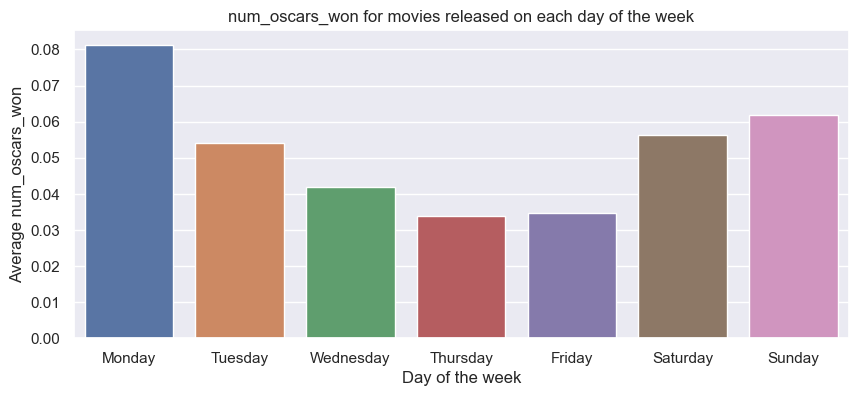

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won,WeekDay,WeekDay Name
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,8,24,tt0228333,4.9,56854.0,0.0,NaN,4,Friday
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,8,16,tt0029852,6.8,2265.0,1.0,[1939],1,Tuesday
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,4,4,tt0119548,5.8,1129.0,0.0,NaN,4,Friday
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,11,8,tt0097499,7.5,31169.0,1.0,[1990],2,Wednesday
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,8,27,tt0058331,7.8,181595.0,5.0,"[1965, 1965, 1965, 1965, 1965]",3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81748,26482675,/m/0bbwngb,Eşrefpaşalılar,2010-03-05,1847671.0,NaN,{},{},"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...",2010,3,5,tt1601823,4.8,1986.0,0.0,NaN,4,Friday
81749,23851782,/m/06_vb43,The Ghost Train,1941-05-03,NaN,82.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",1941,5,3,tt0033660,6.2,1582.0,0.0,NaN,5,Saturday
81751,32468537,/m/0crwd9y,Shadow Boxing 2,2007-10-18,NaN,132.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/06bnz"": ""Russia""}","{""/m/01z02hx"": ""Sports"", ""/m/0lsxr"": ""Crime Fi...",2007,10,18,tt0459759,5.8,1066.0,0.0,NaN,3,Thursday
81753,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1,21,tt1606259,6.8,3191.0,0.0,NaN,4,Friday


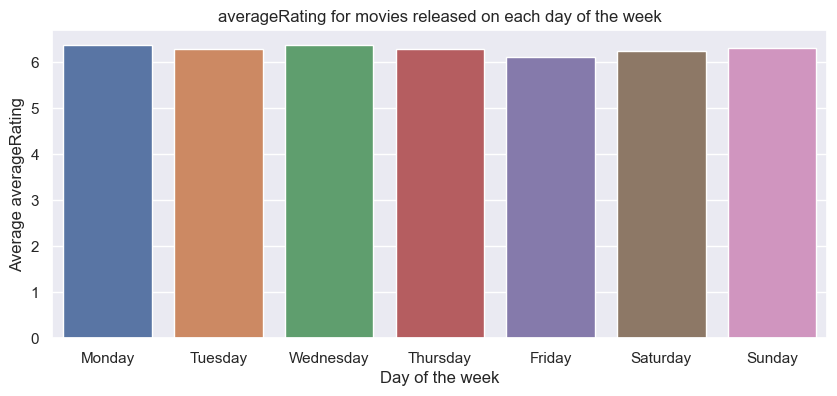

In [68]:
weekday_count_for_DF(df_time_stamps)
show_var_weekday_for_DF(df_time_stamps, 'Box office')
show_var_weekday_for_DF(df_time_stamps, 'num_oscars_won')
show_var_weekday_for_DF(df_time_stamps, 'averageRating')

Everything China


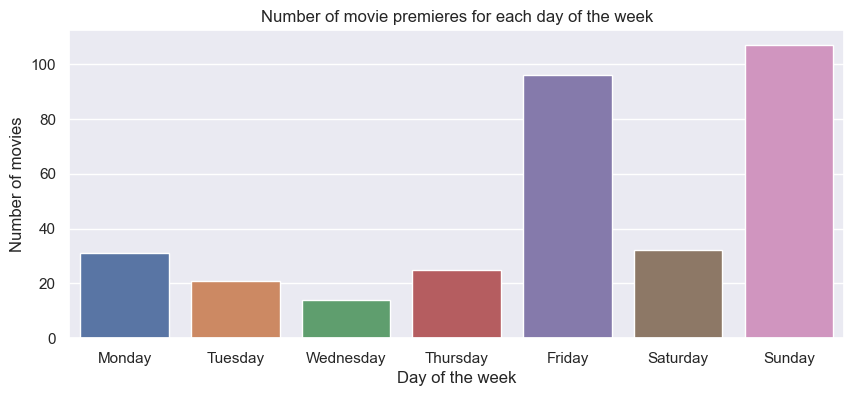

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won,WeekDay,WeekDay Name
251,6703617,/m/0gj6pd,The Forbidden Kingdom,2008-04-04,127906624.0,105.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/08322"": ""Wuxia"", ""/m/0hj3n2k"": ""Fantasy A...",2008,4,4,tt0865556,6.5,108578.0,0.0,NaN,4,Friday
846,32066330,/m/0gw_pc6,Overheard 2,2011-08-18,159000000.0,121.0,"{""/m/012w70"": ""Cantonese"", ""/m/0459q4"": ""Stand...","{""/m/03h64"": ""Hong Kong"", ""/m/0d05w3"": ""China""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",2011,8,18,tt1852904,6.7,1902.0,0.0,NaN,3,Thursday
2133,24373655,/m/07s5kvr,"A Woman, A Gun And A Noodle Shop",2009-12-11,38000000.0,95.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/03h64"": ""Hong Kong"", ""/m/0d05w3"": ""China""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2009,12,11,tt1428556,5.7,3405.0,0.0,NaN,4,Friday
2826,4213154,/m/0bq8pl,The White Countess,2005-12-21,4092682.0,135.0,"{""/m/01r2l"": ""Chinese language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/068d7h"": ""Romantic drama"", ""/m/04xvlr"": ""...",2005,12,21,tt0384686,6.5,6881.0,0.0,NaN,2,Wednesday
2885,34611699,/m/0j2903w,Pleasant Goat and Big Big Wolf: Mission Incred...,2012-01-12,25900000.0,85.0,"{""/m/0653m"": ""Standard Mandarin""}","{""/m/0d05w3"": ""China""}","{""/m/05p553"": ""Comedy film"", ""/m/03k9fj"": ""Adv...",2012,1,12,tt2193271,4.9,81.0,0.0,NaN,3,Thursday
2996,22667247,/m/05znbh7,Bodyguards and Assassins,2009-12-18,5837674.0,138.0,"{""/m/0459q4"": ""Standard Cantonese"", ""/m/02h40l...","{""/m/03h64"": ""Hong Kong"", ""/m/0d05w3"": ""China""}","{""/m/01jfsb"": ""Thriller"", ""/m/0cq22f9"": ""Actio...",2009,12,18,tt1403130,6.8,8454.0,0.0,NaN,4,Friday
4828,31371925,/m/0gl02yg,A Simple Life,2011-09-05,3580000.0,119.0,"{""/m/01r2l"": ""Chinese language"", ""/m/0459q4"": ...","{""/m/03h64"": ""Hong Kong"", ""/m/0d05w3"": ""China""}","{""/m/07s9rl0"": ""Drama"", ""/m/0gw5qqq"": ""Chinese...",2011,9,5,tt2008006,7.5,6201.0,0.0,NaN,0,Monday
10979,13174839,/m/02zb0nj,Eye in the Sky,2007,1792872.0,90.0,"{""/m/0653m"": ""Standard Mandarin"", ""/m/02h40lc""...","{""/m/03h64"": ""Hong Kong"", ""/m/0d05w3"": ""China""}","{""/m/01jfsb"": ""Thriller"", ""/m/03btsm8"": ""Actio...",2007,6,21,tt0901488,6.7,1967.0,0.0,NaN,3,Thursday
12792,2657861,/m/07vwm0,Eros,2004-09-10,1535829.0,107.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/068d7h"": ""Romantic drama"", ""/m/02l7c8"": ""...",2004,9,10,tt0343663,5.9,7210.0,0.0,NaN,4,Friday
15544,31820610,/m/0gttpdf,Snow Flower and the Secret Fan,2011-06-24,11348205.0,120.0,{},"{""/m/0d05w3"": ""China""}","{""/m/04xvlr"": ""Period piece"", ""/m/07s9rl0"": ""D...",2011,6,24,tt1541995,6.1,3955.0,0.0,NaN,4,Friday


50


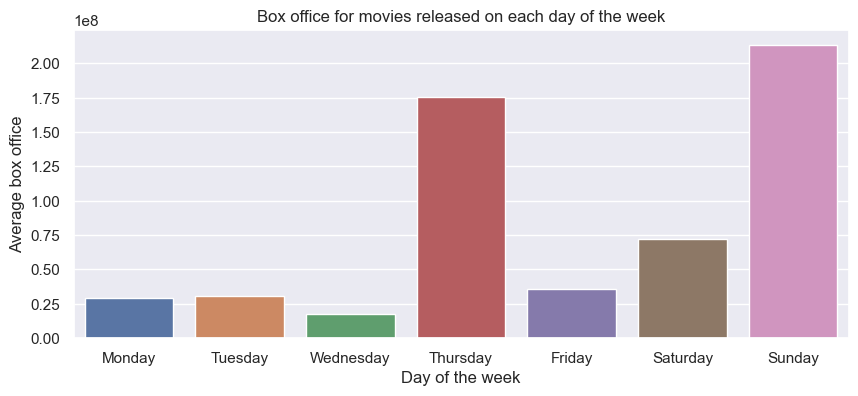

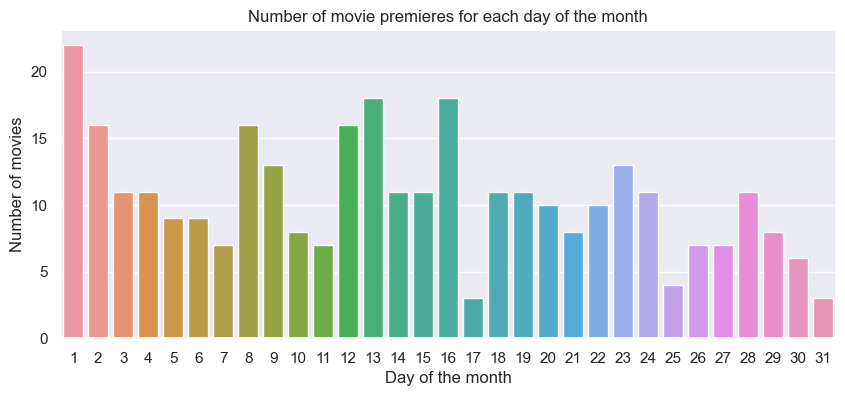

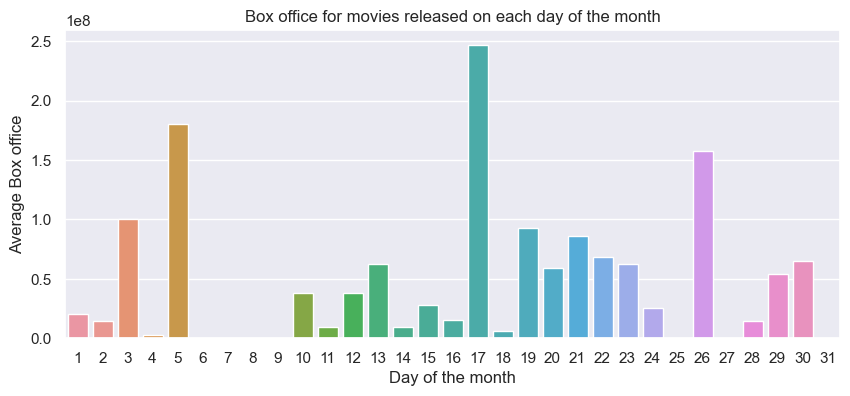

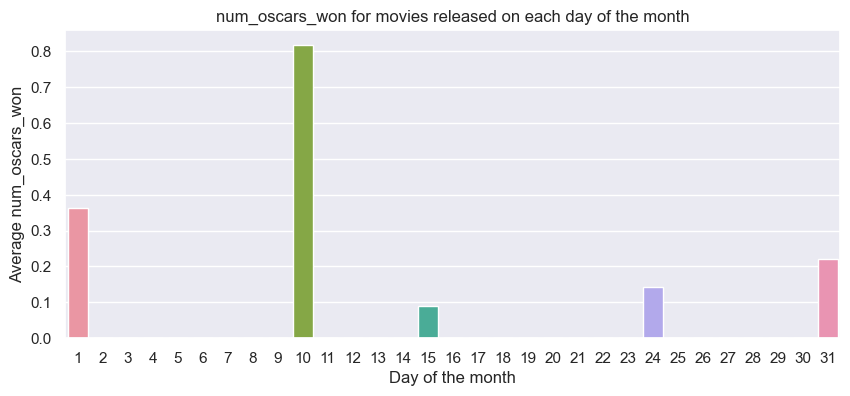

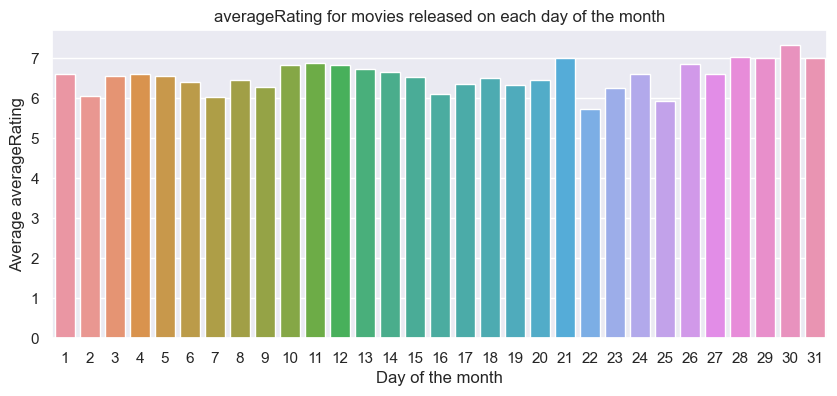

In [66]:
df_movie_china = df_time_stamps.copy(deep=True)
df_movie_china = df_movie_china[df_movie_china['Countries (Freebase ID:name tuples)'].str.contains('China')==True]

print('Everything China')
weekday_count_for_DF(df_movie_china)
boxoffice_weekday_for_DF(df_movie_china)
show_release_count_per_day_for_DF(df_movie_china)
show_var_day_for_DF(df_movie_china, 'Box office')
show_var_day_for_DF(df_movie_china, 'num_oscars_won')
show_var_day_for_DF(df_movie_china, 'averageRating')

In [36]:
df_movie_america = df_time_stamps.copy(deep=True)
df_movie_america = df_movie_america[df_movie_america['Countries (Freebase ID:name tuples)'].str.contains('America')==True]

#weekday_count_for_DF(df_movie_america)
#boxoffice_weekday_for_DF(df_movie_america)
#show_release_count_per_day_for_DF(df_movie_america)
#show_release_boxoffice_per_day_for_DF(df_movie_america)

In [37]:
#display(df_time_stamps)
#df_movie_countries = df_time_stamps.copy(deep=True)
#df_movie_countries.dropna(subset=['Box office'], inplace=True)
#t = df_movie_countries.groupby(['Year', 'WeekDay Name']).count()


In [38]:
# How many movies of each genre ? 


In [39]:
df_genre_list = df_time_stamps.copy(deep=True)

def get_genres(df):
    genres = dict()
    for i, element in enumerate(df['genres (Freebase ID:name tuples)']):
        t = json.loads(element)
        for v in t.items():
            if v[1] not in genres:
                genres[v[1]] = 0
                #print(genres)
            genres[v[1]] = genres[v[1]] + 1
    return genres

genres = get_genres(df_genre_list)
#genres = sorted(genres)
print(genres)
#print(len(genres))

{'Thriller': 6238, 'Science Fiction': 2132, 'Horror': 3333, 'Adventure': 3414, 'Supernatural': 480, 'Action': 5777, 'Space western': 13, 'Mystery': 2305, 'Biographical film': 845, 'Drama': 21189, 'Crime Drama': 415, 'Short Film': 4429, 'Silent film': 3723, 'Indie': 4975, 'Black-and-white': 6544, 'Comedy': 11330, 'Musical': 2475, 'Romantic comedy': 2120, 'Ensemble Film': 372, 'Comedy-drama': 1339, 'Romantic drama': 2455, 'Romance Film': 7024, 'Costume drama': 420, 'War film': 1758, 'Epic': 229, 'Period piece': 1468, 'Film adaptation': 1311, "Children's/Family": 713, 'Fantasy': 1979, 'Family Film': 3140, "Children's Fantasy": 223, 'Future noir': 30, 'Erotic thriller': 144, 'Crime Fiction': 4719, 'Coming of age': 748, 'Marriage Drama': 150, 'World cinema': 4489, 'Western': 1577, 'Black comedy': 818, 'Action/Adventure': 3390, 'Cult': 623, 'Adventure Comedy': 127, 'Slapstick': 537, 'Biopic [feature]': 482, 'Historical Epic': 77, 'Political drama': 595, 'Historical fiction': 390, 'Psychologi

Everything porn


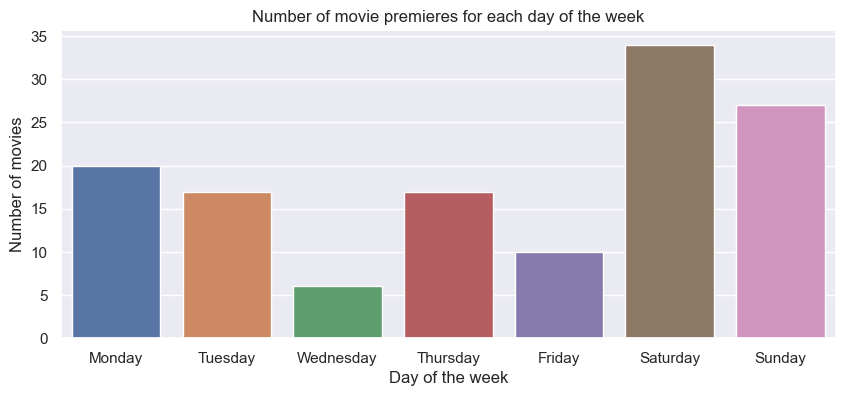

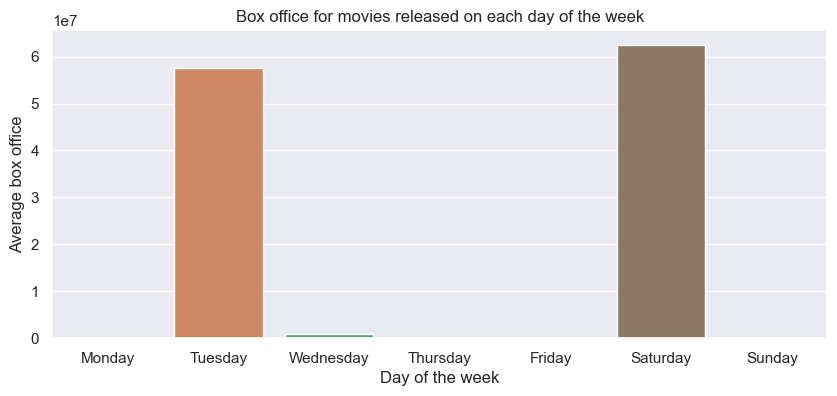

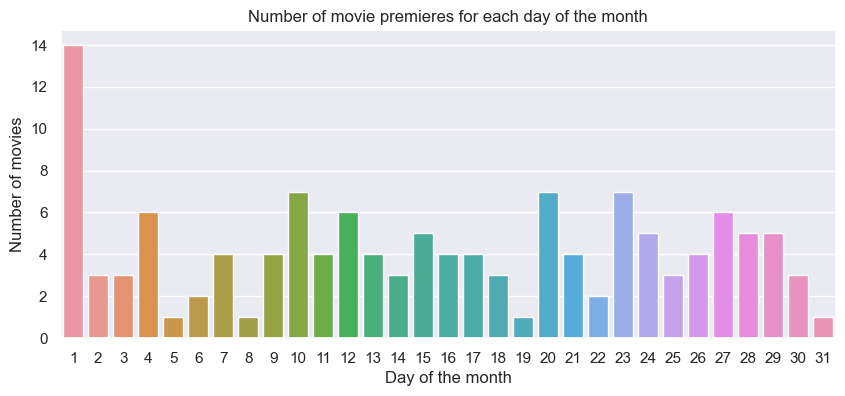

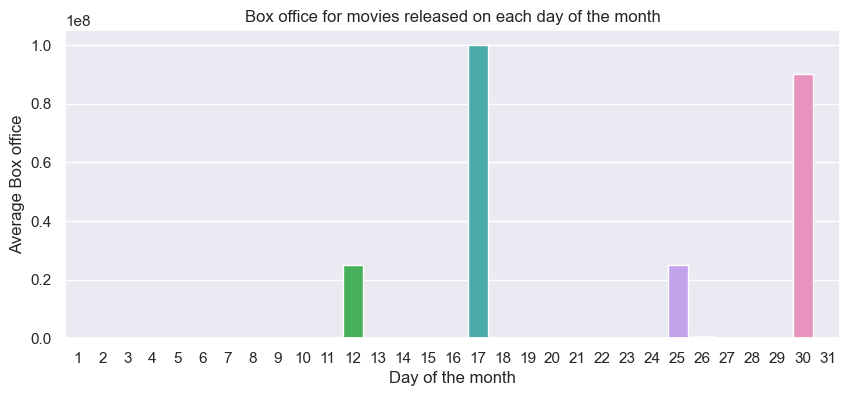

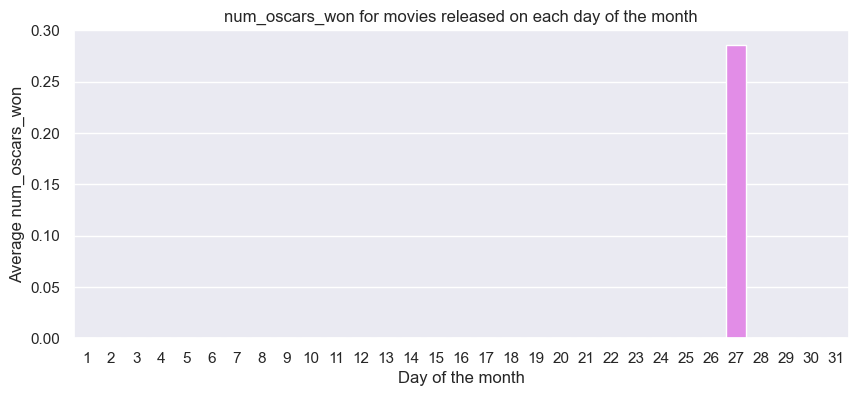

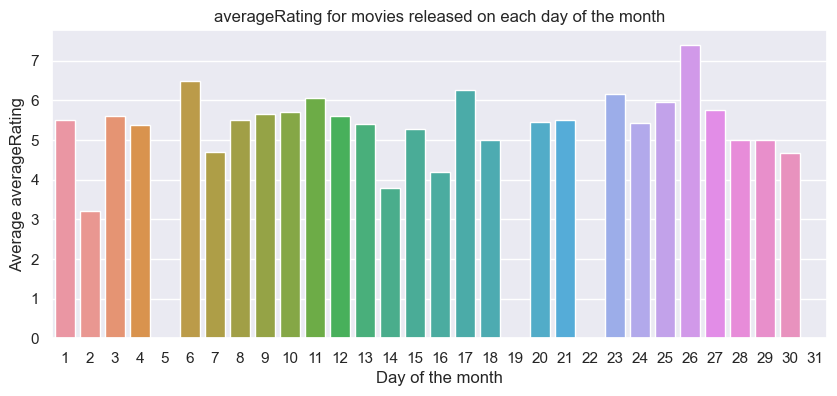

In [40]:
# How much money do Porno movies make ?

df_movie_porn = df_time_stamps.copy(deep=True)
df_movie_porn = df_movie_porn[df_movie_porn['genres (Freebase ID:name tuples)'].str.contains('Pornographic movie')==True]

print("Everything porn")
weekday_count_for_DF(df_movie_porn)
boxoffice_weekday_for_DF(df_movie_porn)
show_release_count_per_day_for_DF(df_movie_porn)
show_var_day_for_DF(df_movie_porn, 'Box office')
show_var_day_for_DF(df_movie_porn, 'num_oscars_won')
show_var_day_for_DF(df_movie_porn, 'averageRating')

In [41]:
sorted_genres = sorted(genres.items(), key=lambda x:x[1], reverse=True)
df_movie_genre = df_time_stamps.copy(deep=True)
df_movie_genre.dropna(subset=['Box office'], inplace=True)

n_genre = 20

list_genres = list(dict(sorted_genres).keys())[0:n_genre]

for i in range(10):
    boxoffice_mean = df_movie_genre[df_movie_genre['genres (Freebase ID:name tuples)']
                       .str.contains(sorted_genres[i][0])==True]['Box office'].mean()
    print(f'Average box office for {sorted_genres[i][0]} : {int(boxoffice_mean):,}, which represents {sorted_genres[i][1]:,} movies')


Average box office for Drama : 41,711,679, which represents 21,189 movies
Average box office for Comedy : 52,215,997, which represents 11,330 movies
Average box office for Romance Film : 45,809,834, which represents 7,024 movies
Average box office for Black-and-white : 6,236,742, which represents 6,544 movies
Average box office for Thriller : 71,745,214, which represents 6,238 movies
Average box office for Action : 89,187,861, which represents 5,777 movies
Average box office for Indie : 14,393,350, which represents 4,975 movies
Average box office for Crime Fiction : 51,635,503, which represents 4,719 movies
Average box office for World cinema : 20,251,801, which represents 4,489 movies
Average box office for Short Film : 31,881,762, which represents 4,429 movies


In [42]:
#df2 = pd.crosstab(df_movie_genre['genres (Freebase ID:name tuples)'],df_movie_genre['Box office'])
#sbn.heatmap(df2, annot=True, vmin = 0, vmax = 20)

# TODO : create a new df for each genre and add a column genre (populated with that genre) and then merge all
# of those tables. Then heatmap motherDF['genre'], motherDF['weekDay']

In [43]:
df_genre_list = []
for i in range(n_genre): # todo replace df_movie_genre with df_time_stamps
    temp_df = df_time_stamps[df_time_stamps['genres (Freebase ID:name tuples)']
                             .str.contains(sorted_genres[i][0])==True].copy(deep=True)
    temp_df['Genre'] = sorted_genres[i][0]
    df_genre_list.append(temp_df)

df_movie_genre = pd.concat(df_genre_list)

df_movie_genre.dropna(subset=['Genre'], inplace=True)
display(df_movie_genre)

,Wikipedia ID,Freebase ID,Name,Release date,Box office,Runtime,Languages (Freebase ID:name tuples),Countries (Freebase ID:name tuples),genres (Freebase ID:name tuples),Year,Month,Day,tconst,averageRating,numVotes,num_oscars_won,years_won,WeekDay,WeekDay Name,Genre
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,2,16,tt0245916,NaN,NaN,0.0,NaN,2,Wednesday,Drama
12,6631279,/m/0gffwj,Little city,1997-04-04,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,4,4,tt0119548,5.8,1129.0,0.0,NaN,4,Friday,Drama
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa...",1989,11,8,tt0097499,7.5,31169.0,1.0,[1990],2,Wednesday,Drama
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""...",1964,8,27,tt0058331,7.8,181595.0,5.0,"[1965, 1965, 1965, 1965, 1965]",3,Thursday,Drama
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",1999,10,1,tt0133122,5.1,5956.0,0.0,NaN,4,Friday,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81668,31341245,/m/0dlq5hn,1½ Knights - In Search of the Ravishing Prince...,2008-12-18,NaN,115.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/05p553"": ""Comedy film""}",2008,12,18,tt1187047,3.7,2521.0,0.0,NaN,3,Thursday,Comedy film
81671,31627556,/m/0gmdz8p,Tween Hearts the Movie,2011-08-24,NaN,NaN,{},"{""/m/05v8c"": ""Philippines""}","{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...",2011,8,24,tt2018159,6.7,45.0,0.0,NaN,2,Wednesday,Comedy film
81703,17288740,/m/043mmgb,La Tour Montparnasse Infernale,2001-03-28,NaN,92.0,"{""/m/064_8sq"": ""French Language""}","{""/m/0f8l9c"": ""France""}","{""/m/05p553"": ""Comedy film"", ""/m/0hj3m_x"": ""Cr...",2001,3,28,tt0259060,5.7,5407.0,0.0,NaN,2,Wednesday,Comedy film
81746,31353375,/m/0gkz70w,The Luck of the Navy,1927-11-22,NaN,110.0,{},"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/06ppq"": ""Silent ...",1927,11,22,tt0333838,NaN,NaN,0.0,NaN,1,Tuesday,Comedy film


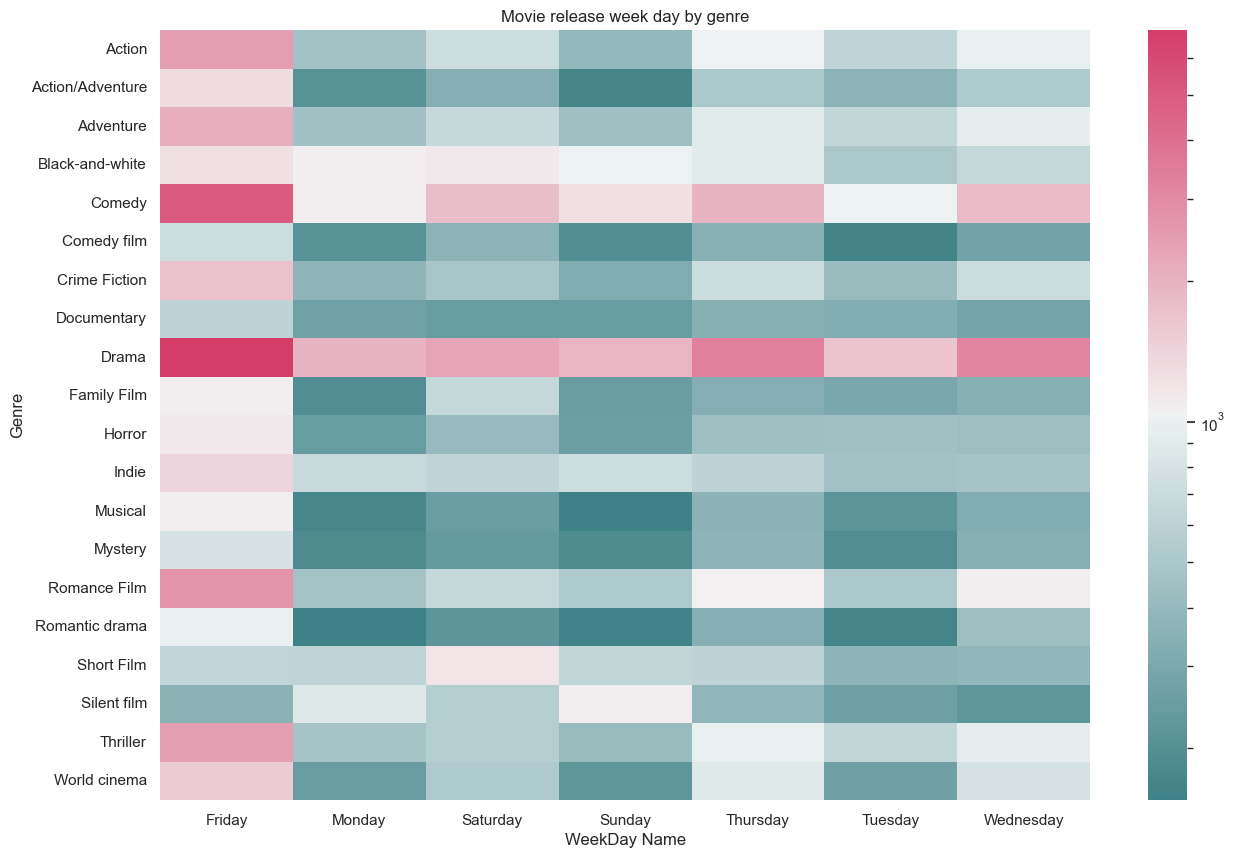

In [44]:

df_genre_weekday = pd.crosstab(df_movie_genre['Genre'],df_movie_genre['WeekDay Name'])
plt.subplots(figsize=(15, 10))
sbn.heatmap(df_genre_weekday, annot=False, cmap=sbn.diverging_palette(200, 0, as_cmap=True), norm=LogNorm())
plt.title('Movie release week day by genre')
plt.show()

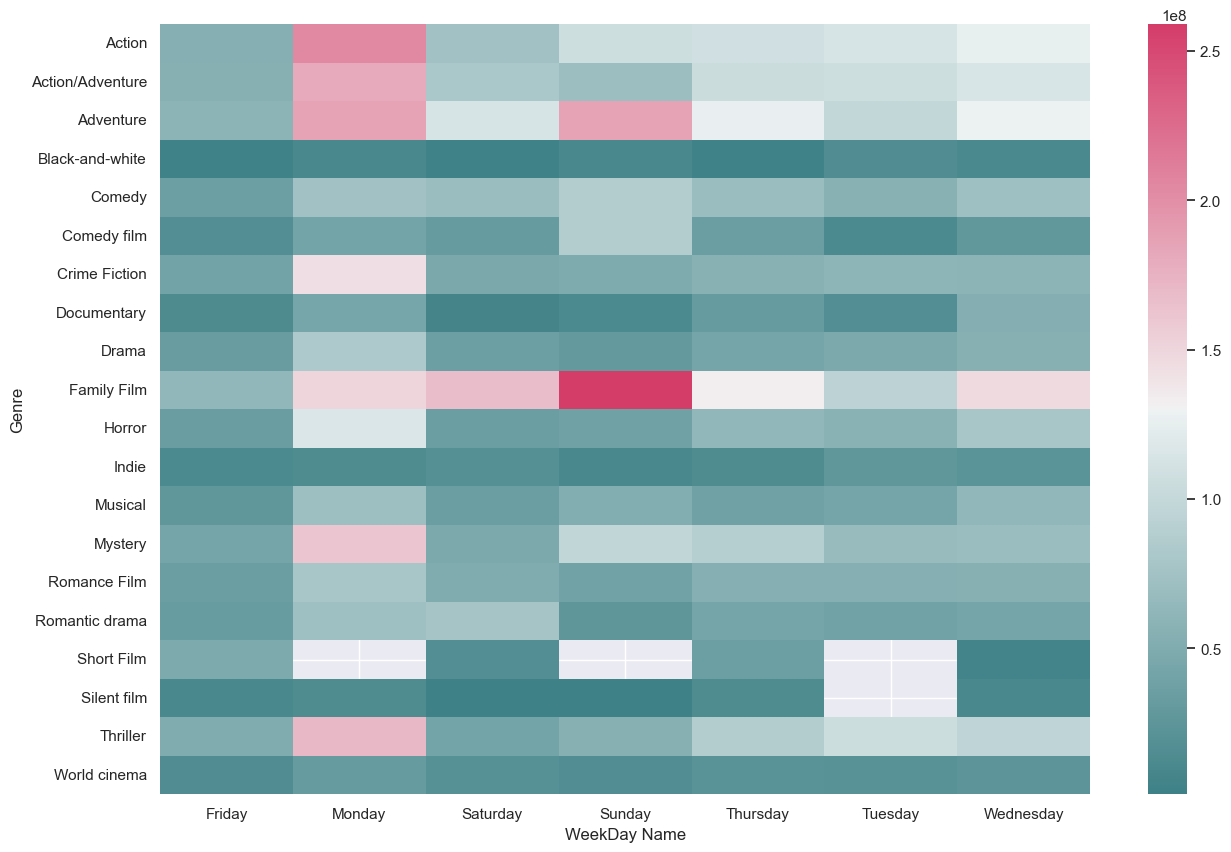

In [45]:
df_movie_genre_boxoffice = df_movie_genre.copy(deep=True)
df_movie_genre_boxoffice.dropna(subset=['Box office'], inplace=True)

df_genre_boxoffice = pd.crosstab(df_movie_genre_boxoffice['Genre'],df_movie_genre_boxoffice['WeekDay Name'],
                  values=df_movie_genre_boxoffice['Box office'],aggfunc='mean')

plt.subplots(figsize=(15, 10))
sbn.heatmap(df_genre_boxoffice, annot=False, cmap=sbn.diverging_palette(200, 0, as_cmap=True))
plt.show()

Everything BUT America


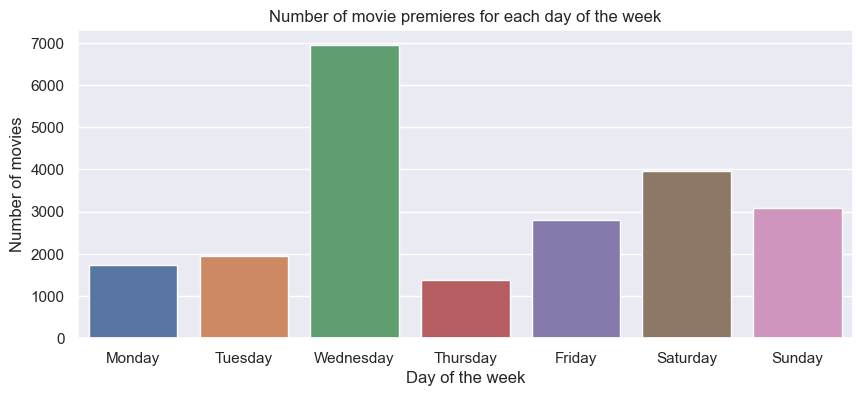

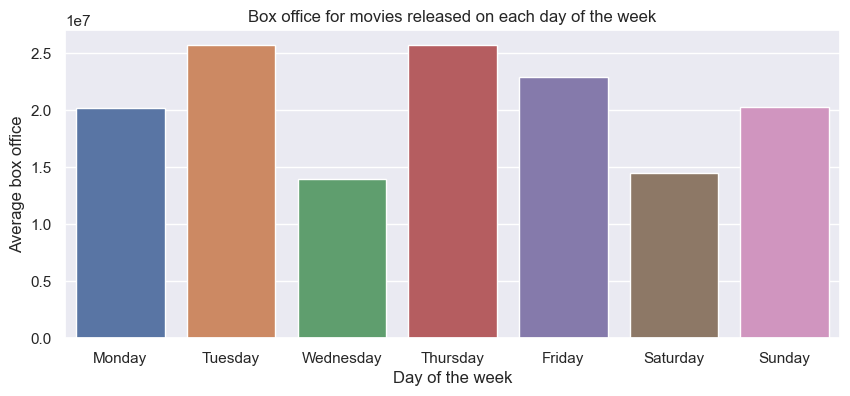

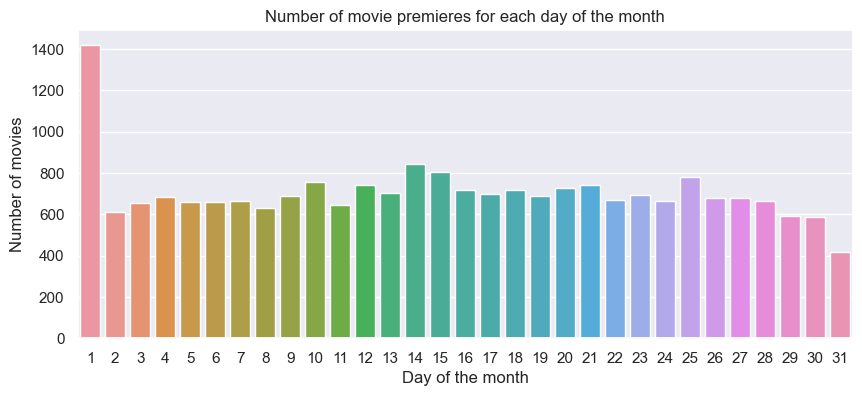

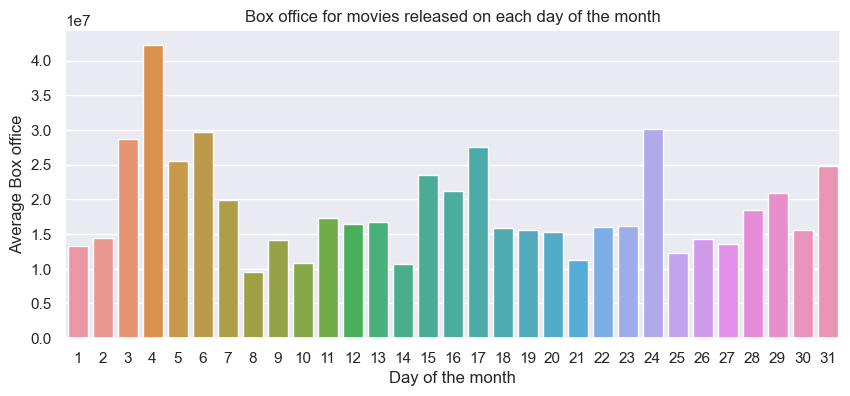

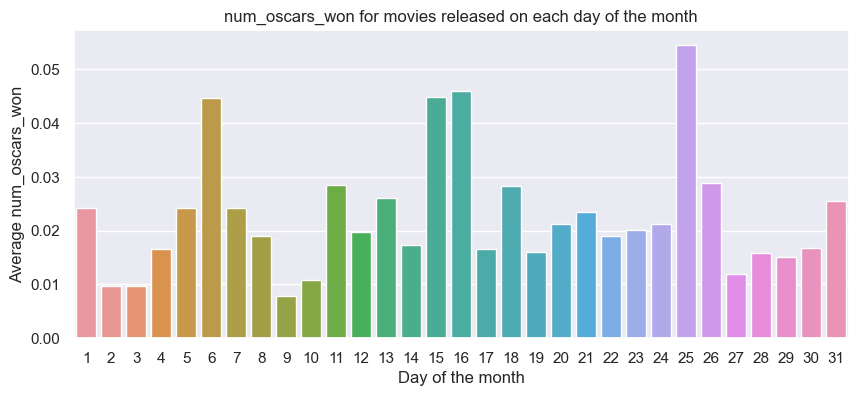

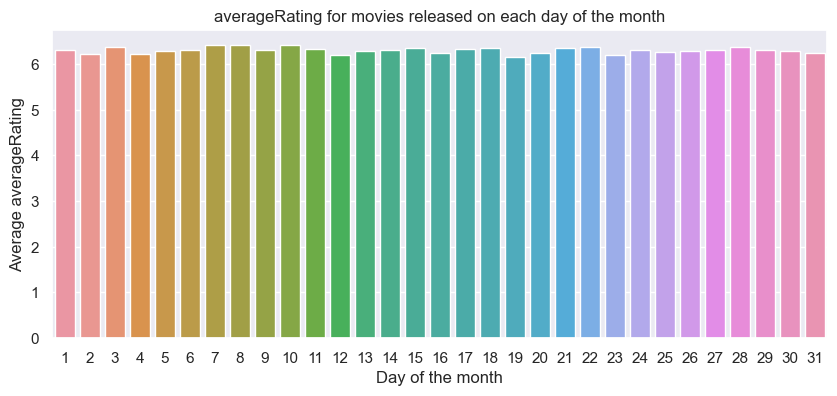

In [46]:
df_movie_not_america = df_time_stamps.copy(deep=True)
df_movie_not_america = df_movie_not_america[df_movie_not_america['Countries (Freebase ID:name tuples)']
                                            .str.contains('America')==False]

print('Everything BUT America')
weekday_count_for_DF(df_movie_not_america)
boxoffice_weekday_for_DF(df_movie_not_america)
show_release_count_per_day_for_DF(df_movie_not_america)
show_var_day_for_DF(df_movie_not_america, 'Box office')
show_var_day_for_DF(df_movie_not_america, 'num_oscars_won')
show_var_day_for_DF(df_movie_not_america, 'averageRating')